<a href="https://colab.research.google.com/github/muhammedafsalpm/coursera_datascience_peer_assignment/blob/main/peer_assignment_coursera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 1: Use yfinance to Extract Stock Data**

In [20]:
import yfinance as yf

# Extract Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index and display the first five rows
tesla_data_reset = tesla_data.reset_index()
tesla_data_reset.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# **Question 2: Use Webscraping to Extract Tesla Revenue Data**

In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL containing Tesla's revenue data (e.g., Yahoo Finance or Tesla's financial page)
tesla_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Scraping the webpage
html_data = requests.get(tesla_url).text
soup = BeautifulSoup(html_data, "html.parser")

# Find all tables on the page
tables = soup.find_all("table")

# Print out the number of tables found
print(f"Number of tables found: {len(tables)}")

# Display the first few tables (to help us identify the correct one)
for i, table in enumerate(tables[:3]):  # Check first 3 tables
    print(f"\nTable {i+1}:")
    print(table.prettify())  # Pretty-print to inspect the table structure

# Try reading the table (use index 0 or another index based on inspection)
if len(tables) > 1:  # Ensure we have at least 2 tables
    revenue_table = tables[1]
    tesla_revenue = pd.read_html(str(revenue_table))[0]
    # Display the last five rows
    print(tesla_revenue.tail())
else:
    print("Target table not found on the webpage.")


Number of tables found: 0
Target table not found on the webpage.


# **Question 3: Use yfinance to Extract Stock Data for GameStop**

In [22]:
# Extract GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset the index and display the first five rows
gme_data_reset = gme_data.reset_index()
gme_data_reset.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# **Question 4: Use Webscraping to Extract GameStop Revenue Data**

In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL containing GameStop's revenue data
gme_url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Scraping the webpage
html_data = requests.get(gme_url).text
beautiful_soup = BeautifulSoup(html_data, "html.parser")

# Find all tables on the page
tables = beautiful_soup.find_all("table")

# Initialize table_index to None
table_index = None

# Search for the table with the "GameStop Quarterly Revenue" text
for index, table in enumerate(tables):
    if "GameStop Quarterly Revenue" in str(table):  # Check if the table contains the string
        table_index = index
        break  # Exit the loop once we find the correct table

# If the table was found, extract the data
if table_index is not None:
    # Initialize an empty DataFrame
    gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

    # Collect the data from the table
    for row in tables[table_index].tbody.find_all("tr"):
        col = row.find_all("td")
        if col != []:
            date = col[0].text.strip()
            revenue = col[1].text.strip().replace("$", "").replace(",", "")
            gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

    # Display the first few rows
    print(gme_revenue.head())
else:
    print("Target table 'GameStop Quarterly Revenue' not found on the webpage.")


Target table 'GameStop Quarterly Revenue' not found on the webpage.



# **Question 5: Plot Tesla Stock Graph**

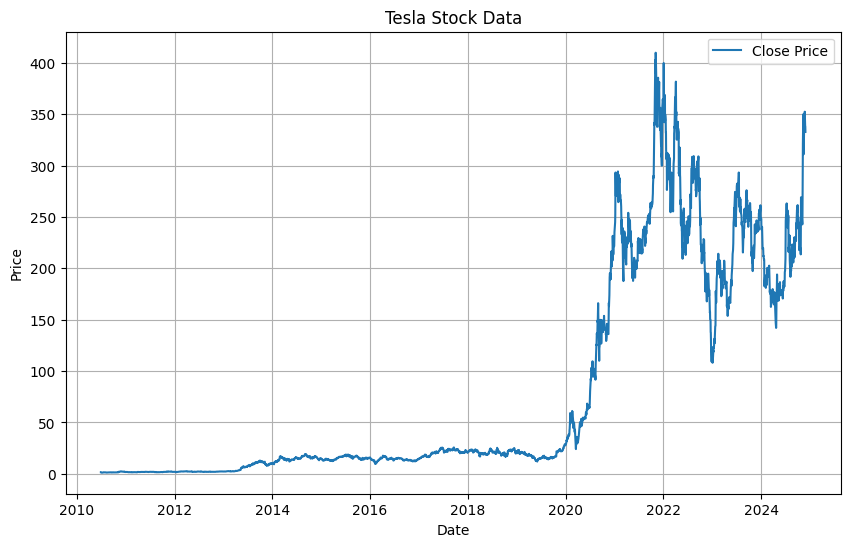

In [24]:
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    plt.figure(figsize=(10,6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.title(title + ' Stock Data')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Tesla Stock Graph
make_graph(tesla_data_reset, "Tesla")


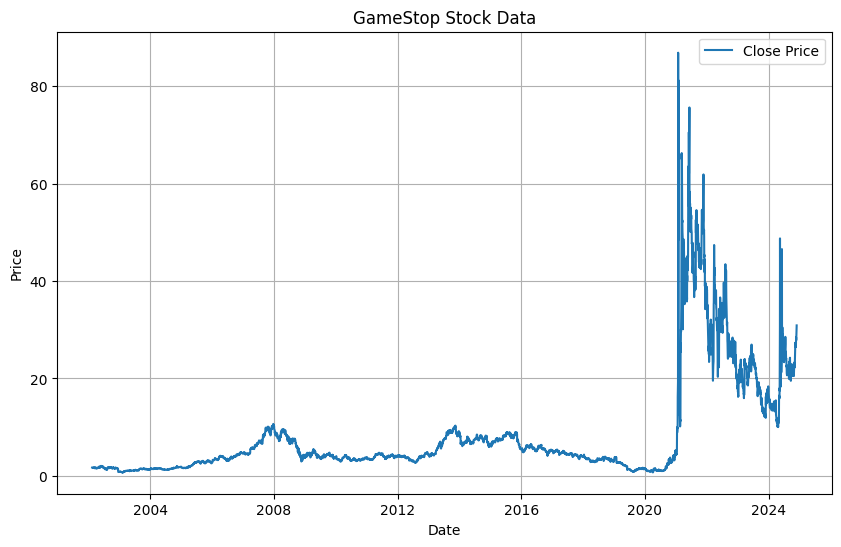

In [25]:
# Plot GameStop Stock Graph
make_graph(gme_data_reset, "GameStop")
